<h1> Mapping Using Twitter API</h1>
    <h3> Import libraries.
    <br> Collect tweets.
    <br> Remove url from tweets.
    <br> Create a list of words in tweets.
    </h3>

In [9]:
import tweepy
import re
import configparser

config = configparser.ConfigParser()
config.read('access.ini')

auth = tweepy.OAuthHandler(config['TWITTER']['API_key'], config['TWITTER']['API_key_secret'])
auth.set_access_token(config['TWITTER']['Access_Token'], config['TWITTER']['Access_Token_Secret'])


def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

api = tweepy.API(auth, wait_on_rate_limit=True)

public_tweets = api.home_timeline()

all_tweets = []
for tweet in public_tweets:
    all_tweets.append(remove_url( tweet.text))
print(all_tweets)


['RT hellenkeniford a cool thing about being a predator in academia is that once youre found out you still get paid the same amount but', 'Today is this brilliant gorgeous so lusciously moisturized fine aunties birthday Help me wish my darling friend', 'NPR is doing a story on All in the Family turning 50 same as me and man I remember hating Archie Bunker when I wa', 'which i say as someone who is pretty constantly misgendered because im not willing to do the continual selfouting', 'i was just talking about this last night and id add 3 its a coercive use of teacher power over students', 'RT YouandCO2CCE Thanks to our new followers We tweet about our own project and crosscurricular climate change education We want stud', 'Well this is the first Ive heard of young men being drawn to pornography and video games', 'I like books', 'Im going to get dragged I know but for many years I wholly believed this song was a cover from the Phil Spector', 'RT hyperallergic Tamara Lanier continues her q

<h2> Use Pandas to sort and analyze tweets.</h2>
    <h3> Set up search word and date.
    <br> Collect and sort tweets.
    <br> Choose columns for DataFrame.
    <br> Save the content of the DataFrame to a local file to only poll once from Twitter.
</h3>

In [4]:
import pandas as pd

search_words = "#COVIDvaccine"
date_since = "2019-10-01"
tweets = tweepy.Cursor(api.search_tweets,
              q=search_words, lang="en").items(300)

tweets_sorted = [[tweet.user.screen_name, tweet.geo, tweet.user.location, remove_url(tweet.text)] for tweet in tweets]

tdf = pd.DataFrame(data=tweets_sorted, columns=['user', 'coordinates','location', 'tweet'])
print(tdf)

tdf.to_csv('tweet_data.csv')


Rate limit reached. Sleeping for: 791


                user coordinates               location  \
0       JackSlaterPT        None                          
1       SantisHealth        None            Toronto, ON   
2       MuggleBornNY        None           New York, NY   
3       angelaananan        None                          
4    Act4Freedom2021        None           Florida, USA   
..               ...         ...                    ...   
295    DawnBreaks_KR        None                          
296    MarciaPinho19        None        Porto, Portugal   
297     marcia_pinho        None                 Brazil   
298      realrmwoisi        None                          
299         macdosha        None  Stoney Creek, Ontario   

                                                 tweet  
0    RT DrJohnB2 The incidence of myocarditis is in...  
1    Novavax files for COVID19 vaccine approval in ...  
2    RT JulieNimoy My Dad believed strongly in crea...  
3    RT DrJohnB2 From the experience of SARSCoV vac...  
4    R

<h3> Read tweets from file.
<br> Display locations mentioned more than 3 times in tweets. 
</h3>

In [10]:
tdf = pd.read_csv('tweet_data.csv', index_col=0)

locs = tdf['location'].value_counts()
locs=locs[locs>=3]
print(locs)

Bengaluru, India    12
USA                  5
Florida, USA         4
Sri Lanka            3
New York, NY         3
Name: location, dtype: int64


<h2> Find Locations. </h2>
    <h3> Import geocoder libraries.
    <br> find_location is a function that returns longitude and latitude of a given location.
    <br> Leverage find_location to build a data frame that contains longitude and latitude columns.
    <br> Note: commented out code was a failed attempt to limit the data plot to the US.
    </h3>

In [12]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

#US Boundaries
us_lat_min = 30.0902
us_lat_max = 44.5260 
us_long_min = -74.7129
us_long_max = -120.2551

geolocator = Nominatim(user_agent='twitter-analysis-client')
limited = RateLimiter(geolocator.geocode, min_delay_seconds=0.05)

def find_location(row):
    place = row['location']
    location = limited(place)
    
    if location != None:
        #if(location.latitude >= us_lat_min and location.latitude <= us_lat_max or
           #location.longitude >= us_long_min and location.longitude <= us_long_max  ):
            #print( place, location.latitude, location.longitude )
        return location.latitude, location.longitude
    else:
        return "Not Found", "Not Found"

tdf[['latitude','longitude']] = tdf.apply(find_location, axis="columns", result_type="expand")
tdf

RateLimiter caught an error, retrying (0/2 tries). Called with (*('North Dublin City and County',), **{}).
Traceback (most recent call last):
  File "/Users/nada/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/nada/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/nada/opt/anaconda3/lib/python3.8/http/client.py", line 1332, in getresponse
    response.begin()
  File "/Users/nada/opt/anaconda3/lib/python3.8/http/client.py", line 303, in begin
    version, status, reason = self._read_status()
  File "/Users/nada/opt/anaconda3/lib/python3.8/http/client.py", line 264, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/nada/opt/anaconda3/lib/python3.8/socket.py", line 669, in readinto
    return self._sock.recv_into(b

,user,coordinates,location,tweet,latitude,longitude
0,JackSlaterPT,NaN,NaN,RT DrJohnB2 The incidence of myocarditis is in...,46.314475,11.048029
1,SantisHealth,NaN,"Toronto, ON",Novavax files for COVID19 vaccine approval in ...,43.653482,-79.383935
2,MuggleBornNY,NaN,"New York, NY",RT JulieNimoy My Dad believed strongly in crea...,40.712728,-74.006015
3,angelaananan,NaN,NaN,RT DrJohnB2 From the experience of SARSCoV vac...,46.314475,11.048029
4,Act4Freedom2021,NaN,"Florida, USA",Rocket scientists literally say No Way to COVI...,27.756767,-81.463983
...,...,...,...,...,...,...
295,DawnBreaks_KR,NaN,NaN,RT DrJohnB2 From the experience of SARSCoV vac...,46.314475,11.048029
296,MarciaPinho19,NaN,"Porto, Portugal",RT DrJohnB2 From the experience of SARSCoV vac...,41.149451,-8.610788
297,marcia_pinho,NaN,Brazil,RT DrJohnB2 From the experience of SARSCoV vac...,-10.333333,-53.2
298,realrmwoisi,NaN,NaN,RT Nance726 for those that have recovered from...,46.314475,11.048029


<h3> Plot the geographic location of tweets containing the searched word. </h3>

In [13]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (20, 10)

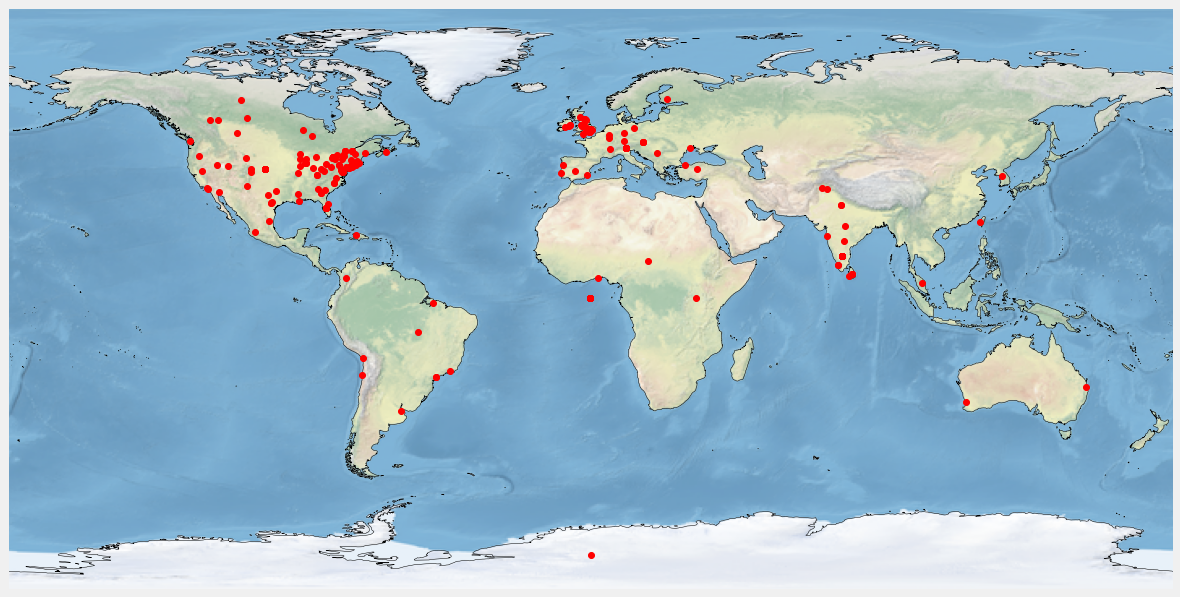

In [14]:
import cartopy.crs as ccrs
from matplotlib.patches import Circle



lats = tdf['latitude'].dropna()
longs = tdf['longitude'].dropna()

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
    
for i in range(0, len(lats)):
    ax.plot(longs[i], lats[i], 'ro', transform=ccrs.PlateCarree())
                                                                                              
ax.coastlines(resolution='50m')
ax.set_global()

plt.show()

<h3> Construct a wordcloud of the tweets. </h3>

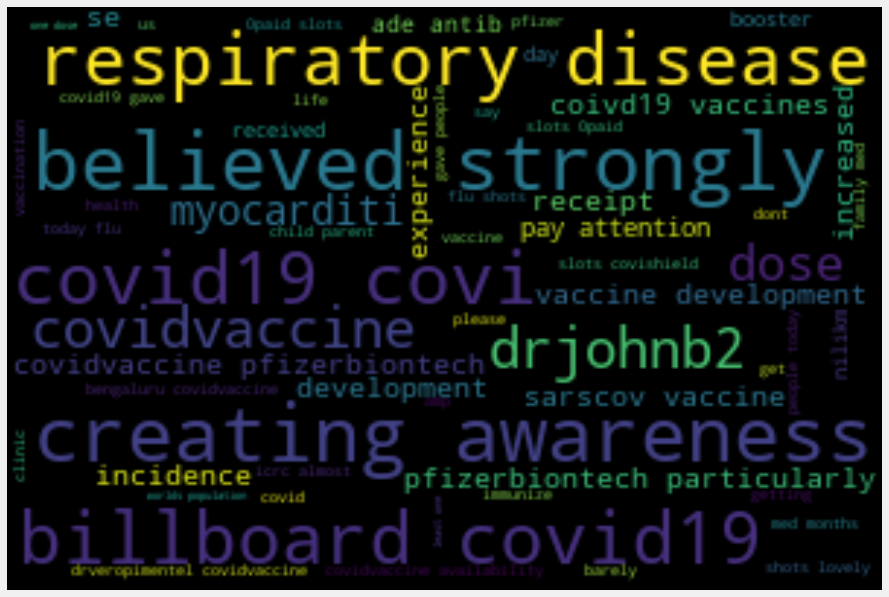

In [57]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = nltk.corpus.stopwords.words('english') 
stopwords.extend(['dad','rt','julienimoy','my', '2', 'would', 'loved'] )

tweet_words = []

for tweet in tdf.tweet:
   tweet_words += re.findall(r'\w+', tweet.lower())

vocabulary = dict( Counter( tweet_words ) )
#print(vocabulary)

text = ' '.join(map(str, tweet_words))

wordcloud = WordCloud(width=300, height=200, stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


<h3> Create a new dictionary that filters out stopwords.
<br> Plot the frequency of the tweet words.
</h3>

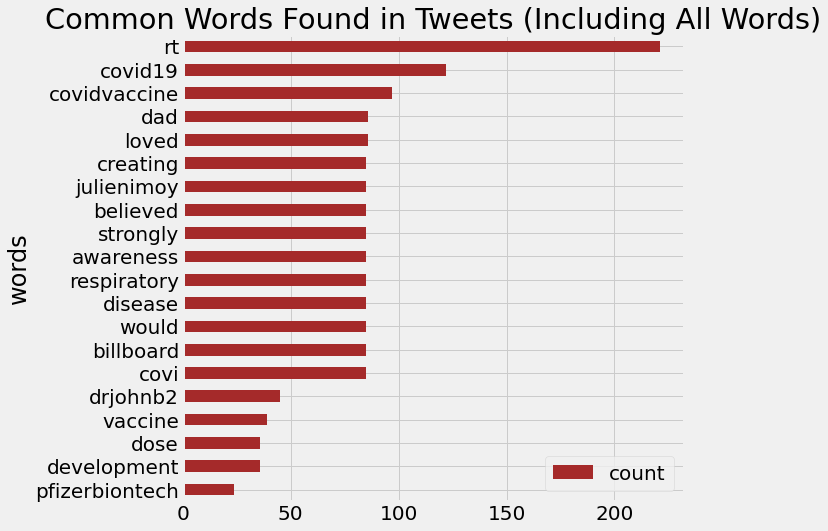

In [71]:

from nltk.corpus import stopwords
from collections import Counter

fig, ax = plt.subplots(figsize=(8, 8))
new_vocab_dict=dict()
for key in vocabulary:
    if key not in stopwords.words('english'):
        new_vocab_dict[ key ] = vocabulary[key] 

new_vocab = Counter( new_vocab_dict )

clean_tweets = pd.DataFrame(new_vocab.most_common(20), columns=['words', 'count'])
clean_tweets.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="brown")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()
